In [7]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cross_validation import *
import xgboost as xgb



# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [8]:
# import data
data_train = pd.read_csv(r'C:\Installs\Data science\heart_decease_prediction\train_values.csv')
data_test = pd.read_csv(r'C:\Installs\Data science\heart_decease_prediction\test_values.csv')
data_var =  pd.read_csv(r'C:\Installs\Data science\heart_decease_prediction\train_labels.csv')

In [9]:
data_train.describe()
#data_var.shape

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000


In [10]:
data_var.columns

Index(['patient_id', 'heart_disease_present'], dtype='object')

In [11]:
#sns.countplot(x='heart_disease_present', data=data_var);


In [12]:
#0:female, 1:male
#sns.countplot(x='fasting_blood_sugar_gt_120_mg_per_dl', data=data_train);

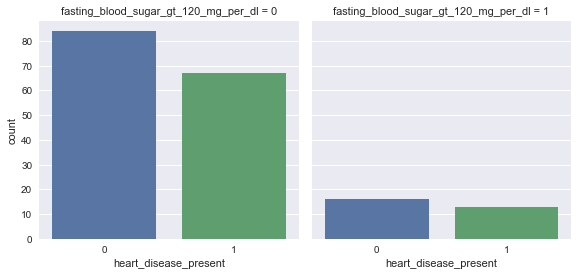

In [13]:
# merge train data to train labels

df_train = pd.merge( data_train,data_var,how='outer', on='patient_id')

# sex and heart disease relation
sns.factorplot(x='heart_disease_present', col='fasting_blood_sugar_gt_120_mg_per_dl', kind='count', data=df_train);

In [14]:

# slope_of_peak_excercise and heart disease relation
#sns.factorplot(x='heart_disease_present', col='slope_of_peak_exercise_st_segment', kind='count', data=df_train);
#sns.factorplot(x='heart_disease_present', col='chest_pain_type', kind='count', data=df_train);
#sns.factorplot(x='heart_disease_present', col='num_major_vessels', kind='count', data=df_train)
#sns.factorplot(x='heart_disease_present', col='exercise_induced_angina', kind='count', data=df_train)


In [15]:
#age distribution
#sns.distplot(df_train.age, kde=False);

In [16]:
#df_train.groupby('heart_disease_present').age.hist(alpha=0.6);

In [17]:
#sns.stripplot(x='heart_disease_present', y='age', data=df_train, alpha=0.3, jitter=True);

In [18]:
#sns.swarmplot(x='heart_disease_present', y='age', data=df_train);

In [19]:
#df_train.groupby('heart_disease_present').age.describe()

In [20]:
#df_train.info()

In [21]:

df_train_final = df_train.drop(['patient_id','heart_disease_present'],axis=1)
df_test_final = data_test.drop('patient_id',axis=1)
df_train_final = pd.get_dummies(df_train_final,drop_first=True)
df_test_final = pd.get_dummies(df_test_final,drop_first=True)
#df_train_final.thal_normal.astype('category')

df_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 14 columns):
slope_of_peak_exercise_st_segment       180 non-null int64
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null int64
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null int64
age                                     180 non-null int64
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
thal_normal                             180 non-null uint8
thal_reversible_defect                  180 non-null uint8
dtypes: float64(1), int64(11), uint8(2)
memory usage: 23.6 KB


In [22]:
#bulding model: transform dataframe to array
X = df_train_final.values
test = df_test_final.values
y = data_var.heart_disease_present.values


In [23]:
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate a decision tree classifier: clf
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: clf_cv
logreg_cv = GridSearchCV(logreg, param_grid=param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X, y)

# Print the tuned parameter and score
print("Tuned Decision Tree Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Decision Tree Parameters: {'C': 0.4393970560760795, 'penalty': 'l2'}
Best score is 0.85


In [21]:
gb_grid_params = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
}

gb_gs = GradientBoostingClassifier()

clf = GridSearchCV(gb_gs,
                               gb_grid_params,
                               cv=2,
                               scoring='roc_auc',
                               verbose = 3, 
                               n_jobs=10);
clf.fit(X, y);

# Print the tuned parameter and score
print("Tuned Decision Tree Parameters: {}".format(clf.best_params_))
print("Best score is {}".format(clf.best_score_))

Fitting 2 folds for each of 84672 candidates, totalling 169344 fits


[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:    6.8s
[Parallel(n_jobs=10)]: Done 678 tasks      | elapsed:    7.8s
[Parallel(n_jobs=10)]: Done 3878 tasks      | elapsed:   11.5s
[Parallel(n_jobs=10)]: Done 8358 tasks      | elapsed:   16.8s
[Parallel(n_jobs=10)]: Done 14118 tasks      | elapsed:   23.7s
[Parallel(n_jobs=10)]: Done 21158 tasks      | elapsed:   32.0s
[Parallel(n_jobs=10)]: Done 29478 tasks      | elapsed:   42.0s
[Parallel(n_jobs=10)]: Done 39078 tasks      | elapsed:   53.4s
[Parallel(n_jobs=10)]: Done 49958 tasks      | elapsed:  1.1min
[Parallel(n_jobs=10)]: Done 62118 tasks      | elapsed:  1.4min
[Parallel(n_jobs=10)]: Done 75558 tasks      | elapsed:  1.7min
[Parallel(n_jobs=10)]: Done 90278 tasks      | elapsed:  2.0min
[Parallel(n_jobs=10)]: Done 106278 tasks      | elapsed:  2.3min
[Parallel(n_jobs=10)]: Done 123558 tasks      | elapsed:  2.8min
[Parallel(n_jobs=10)]: Done 142118 tasks      | elapsed:  3.2min
[Parallel(n_jobs=10)]: Done 161958 tasks   

Tuned Decision Tree Parameters: {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'min_samples_split': 0.17272727272727273, 'n_estimators': 10, 'subsample': 0.85}
Best score is 0.9202499999999999


In [35]:

xgb_model = xgb.XGBClassifier()


param_test = {
    "learning_rate": [0.01, 0.0015,0.025,0.05,0.1],
    "gamma":[0.05,0.1,0.3,0.5,0.7,0.9,1],
    "max_depth":[3,5,7,9,12,15,17,25],
    "min_child_weight":[1,3,5,7],
    "subsample":[0.6,0.7,0.8,0.9,1],
    "colsample_bytree":[0.6,0.7,0.8,0.9,1]
}


clf = GridSearchCV(xgb_model, param_test, n_jobs=20, 
                   cv=StratifiedKFold(y, n_folds=5, shuffle=True), 
                   scoring='roc_auc',
                   verbose=2, refit=True)

clf.fit(X, y)
# Print the tuned parameter and score
print("Tuned Decision Tree Parameters: {}".format(clf.best_params_))
print("Best score is {}".format(clf.best_score_))

Fitting 5 folds for each of 28000 candidates, totalling 140000 fits


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.9s
[Parallel(n_jobs=20)]: Done 122 tasks      | elapsed:   14.3s
[Parallel(n_jobs=20)]: Done 325 tasks      | elapsed:   17.2s
[Parallel(n_jobs=20)]: Done 608 tasks      | elapsed:   22.0s
[Parallel(n_jobs=20)]: Done 973 tasks      | elapsed:   26.2s
[Parallel(n_jobs=20)]: Done 1418 tasks      | elapsed:   31.6s
[Parallel(n_jobs=20)]: Done 1945 tasks      | elapsed:   37.9s
[Parallel(n_jobs=20)]: Done 2552 tasks      | elapsed:   44.8s
[Parallel(n_jobs=20)]: Done 3241 tasks      | elapsed:   52.8s
[Parallel(n_jobs=20)]: Done 4010 tasks      | elapsed:  1.0min
[Parallel(n_jobs=20)]: Done 4861 tasks      | elapsed:  1.2min
[Parallel(n_jobs=20)]: Done 5792 tasks      | elapsed:  1.4min
[Parallel(n_jobs=20)]: Done 6805 tasks      | elapsed:  1.6min
[Parallel(n_jobs=20)]: Done 7898 tasks      | elapsed:  1.8min
[Parallel(n_jobs=20)]: Done 9073 tasks      | elapsed:  2.0min


KeyboardInterrupt: 

In [19]:
# Make predictions and store in 'Survived' column of df_test
Y_pred = clf.predict_proba(test)
data_test['heart_disease_present'] = Y_pred[:,1]


In [20]:
data_test[['patient_id', 'heart_disease_present']].to_csv('kotharv_heart_gb3_tree.csv', index=False)